# New Section

In [ ]:
!pip install scikit-learn
import pandas as pd
import numpy as np

In [ ]:
# Load the dataset
data = pd.read_csv('Task_1.csv')

In [ ]:
# Ensure that the dataset is balanced or handle imbalanced data if needed
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(data['labels']), y=data['labels'])

class_weight_dict = {c: w for c, w in zip(np.unique(data['labels']), class_weights)}

In [ ]:
# Preprocess the data
data['text'] = data['text'].str.lower()
data['text'] = data['text'].str.replace('[^a-zA-Z\s]', '')
data = data.drop(data[data['text'] == ''].index)
data = data.dropna()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer #Fixed typo - it's TfidfVectorizer, not TfidfVectorize
vectorizer = TfidfVectorizer(stop_words=None, max_features=1000, ngram_range=(1, 3))
X = vectorizer.fit_transform(data['text'])
y = data['labels']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(class_weight=class_weight_dict)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(class_weight={'ham': 0.5774093264248704,
                                 'spam': 3.7295850066934406})

In [ ]:
#Import accuracy_score and confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
print("Model accuracy: {:.2f}%".format(accuracy_score(y_test, model.predict(X_test)) * 100))

Model accuracy: 97.85%


Confusion Matrix:
 [[2853   40]
 [  32  419]]
Confusion Matrix:
 [[2853   40]
 [  32  419]]


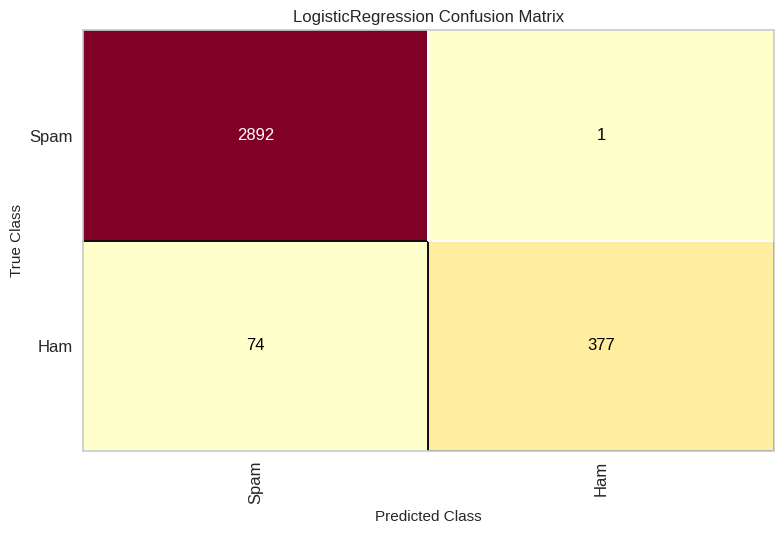

<Axes: title={'center': 'LogisticRegression Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [ ]:
#Import Confusion Matrix and print it for the following model
cm = confusion_matrix(y_test, model.predict(X_test))
print("Confusion Matrix:\n", cm)

from yellowbrick.classifier import ConfusionMatrix
cm = confusion_matrix(y_test, model.predict(X_test))
print("Confusion Matrix:\n", cm)

visualizer = ConfusionMatrix(LogisticRegression(), classes=['Spam', 'Ham'])
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()